In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from time import time

In [188]:
import warnings
warnings.filterwarnings('ignore')

In [189]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [190]:
from Ingestion.kivadataloader import KivaDataLoader
m=KivaDataLoader()
cleaneduploans=m.get_clean_dataframe()

Connected to kivateam.cnd5idfvxmld.us-east-1.rds.amazonaws.com:5432/kiva
The process takes about 5 minutes to run.


In [191]:
cleaneduploans.shape

(1177384, 26)

In [192]:
cleaneduploans.head()

,language_english,description_length,loan_amount,loan_use_length,currency_usd,tags_exist,num_borrowers_female_pct,sector_name_Agriculture,sector_name_Arts,sector_name_Clothing,...,sector_name_Personal Use,sector_name_Retail,sector_name_Services,sector_name_Transportation,sector_name_Wholesale,distribution_model_field_partner,fol,repayment_interval_bullet,repayment_interval_irregular,repayment_interval_weekly
0,1,539.0,1000.0,41.0,1,0,1.0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,0,858.0,300.0,37.0,0,0,1.0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,875.0,125.0,86.0,0,0,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,706.0,1025.0,22.0,0,1,1.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,680.0,1750.0,15.0,0,0,1.0,0,0,0,...,0,1,0,0,0,1,1,1,0,0


In [193]:
cleaneduploans.describe()

,language_english,description_length,loan_amount,loan_use_length,currency_usd,tags_exist,num_borrowers_female_pct,sector_name_Agriculture,sector_name_Arts,sector_name_Clothing,...,sector_name_Personal Use,sector_name_Retail,sector_name_Services,sector_name_Transportation,sector_name_Wholesale,distribution_model_field_partner,fol,repayment_interval_bullet,repayment_interval_irregular,repayment_interval_weekly
count,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06,...,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06,1.177384e+06
mean,6.905045e-01,7.545755e+02,7.579580e+02,5.375018e+01,1.559822e-01,4.059449e-01,7.920015e-01,2.382485e-01,2.239711e-02,5.509757e-02,...,3.827383e-02,2.000214e-01,7.075941e-02,2.567302e-02,1.580623e-03,9.941939e-01,5.354905e-01,6.841948e-02,4.140663e-01,3.541750e-04
std,4.622858e-01,4.052108e+02,9.964608e+02,2.825520e+01,3.628387e-01,4.910742e-01,3.943464e-01,4.260121e-01,1.479713e-01,2.281707e-01,...,1.918567e-01,4.000162e-01,2.564226e-01,1.581579e-01,3.972563e-02,7.597622e-02,4.987390e-01,2.524645e-01,4.925603e-01,1.881621e-02
min,0.000000e+00,0.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.910000e+02,2.750000e+02,3.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,6.450000e+02,4.750000e+02,4.800000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,8.930000e+02,9.000000e+02,6.800000e+01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.000000e+00,1.161000e+04,1.000000e+05,2.149000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Target and Features

In [259]:
#Target
y=cleaneduploans['fol']

In [195]:
y.shape

(1177384,)

In [196]:
#Features
X=cleaneduploans.drop('fol', axis=1)

In [197]:
X.shape

(1177384, 25)

In [198]:
for i in X.isnull():
    if i == True:
        print (i)
print('no missing values')

no missing values


# Feauture selection 

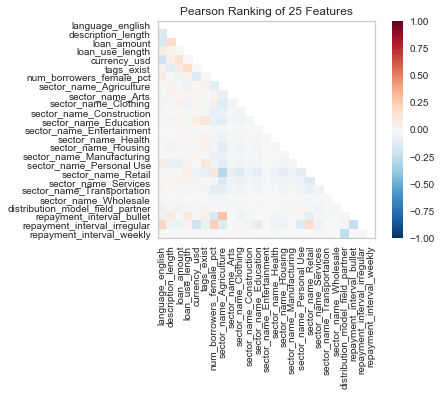

In [199]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=X.columns, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

In [200]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [201]:
model = Lasso(alpha=0.5)
sfm = SelectFromModel(model)
sfm.fit(X, y)
print(list(X.iloc[:, sfm.get_support(indices=True)]))

['description_length', 'loan_amount', 'loan_use_length']


In [202]:
model = Ridge(alpha=0.5)
sfm = SelectFromModel(model)
sfm.fit(X, y)
print(list(X.iloc[:, sfm.get_support(indices=True)]))

['tags_exist', 'num_borrowers_female_pct', 'sector_name_Arts', 'sector_name_Education', 'sector_name_Health', 'sector_name_Manufacturing', 'sector_name_Personal Use', 'distribution_model_field_partner']


In [203]:
model = ElasticNet()
sfm = SelectFromModel(model)
sfm.fit(X, y)
print(list(X.iloc[:, sfm.get_support(indices=True)]))

['description_length', 'loan_amount', 'loan_use_length']


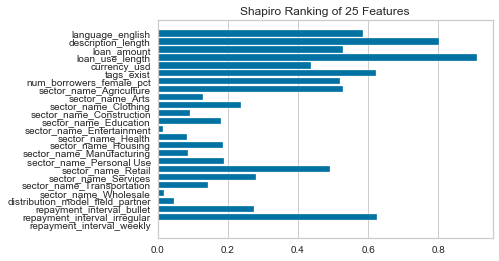

In [204]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(features=X.columns, algorithm='shapiro')

visualizer.fit(X, y)                
visualizer.transform(X)         
visualizer.poof()                     

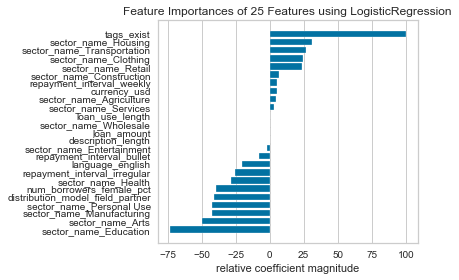

In [205]:
from yellowbrick.features.importances import FeatureImportances
from sklearn.linear_model import LogisticRegression

fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(LogisticRegression(), ax=ax)
viz.fit(X, y)
viz.poof()

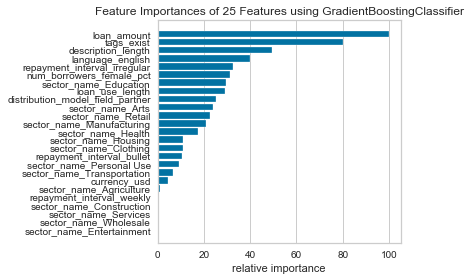

In [206]:
from sklearn.ensemble import GradientBoostingClassifier

fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
viz.fit(X, y)
viz.poof()

# Train and Test

In [207]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [209]:
#scaler=StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)

# Check balance in train and test data

In [210]:
y.value_counts(normalize=True)

1    0.535491
0    0.464509
Name: fol, dtype: float64

In [298]:
c.value_counts(normalize=True)

True     0.929635
False    0.070365
Name: loan_amount, dtype: float64

In [211]:
y_train.value_counts(normalize=True)

1    0.535681
0    0.464319
Name: fol, dtype: float64

In [212]:
y_test.value_counts(normalize=True)

1    0.534727
0    0.465273
Name: fol, dtype: float64

# Model 1: Naive Approach

In [213]:
from sklearn.naive_bayes import GaussianNB

In [214]:
nb = GaussianNB()

In [215]:
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [216]:
expected   = y_test
predicted  = nb.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.54      0.76      0.63    109561
        MTF       0.67      0.44      0.53    125916

avg / total       0.61      0.59      0.58    235477



# Model 2: Logistic Regression

In [217]:
from sklearn.linear_model import LogisticRegression

In [218]:
lr = LogisticRegression(C=0.01)

In [220]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [221]:
expected   = y_test
predicted  = lr.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.62      0.63      0.63    109561
        MTF       0.67      0.67      0.67    125916

avg / total       0.65      0.65      0.65    235477



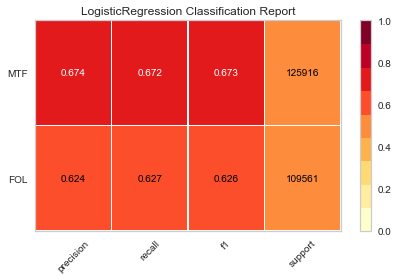

In [222]:
from yellowbrick.classifier import ClassificationReport
fig = plt.figure()
ax = fig.add_subplot()
visualizer = ClassificationReport(lr, ax=ax, classes=['FOL', 'MTF'], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

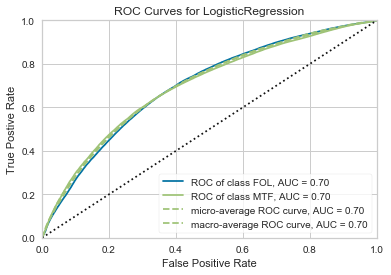

In [223]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(LogisticRegression(), classes=['FOL', 'MTF'])

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
g = visualizer.poof()

In [224]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
params={'C':np.logspace(-4, 4, 5)}
clf = GridSearchCV(lr, params, scoring='neg_log_loss', refit='True', n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
print("best params: " + str(clf.best_params_))
print("best scores: " + str(clf.best_score_))
estimates = clf.predict_proba(X_test)
acc = accuracy_score(y_test, clf.predict(X_test))
print("Accuracy: {:.4%}".format(acc))

best params: {'C': 0.01}
best scores: -0.6305215984299067
Accuracy: 65.0879%


# Model 3: Random Forest

In [225]:
from sklearn.ensemble import RandomForestClassifier

In [226]:
rf = RandomForestClassifier(n_estimators=100)

In [227]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [228]:
expected   = y_test
predicted  = rf.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.62      0.60      0.61    109561
        MTF       0.66      0.68      0.67    125916

avg / total       0.65      0.65      0.65    235477



# Model 4: SVM

In [229]:
from sklearn.svm import LinearSVC

In [230]:
svc = LinearSVC()

In [231]:
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [232]:
expected   = y_test
predicted  = svc.predict(X_test)

classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.47      1.00      0.64    109561
        MTF       0.88      0.00      0.00    125916

avg / total       0.69      0.47      0.30    235477



# Model 5: LDA

In [233]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [234]:
lda = LDA(n_components=2)

In [235]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [236]:
expected   = y_test
predicted  = lda.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.62      0.63      0.63    109561
        MTF       0.68      0.67      0.67    125916

avg / total       0.65      0.65      0.65    235477



# Model 6: Gradient Boosting

In [237]:
from sklearn.ensemble import GradientBoostingClassifier

In [238]:
gbc = GradientBoostingClassifier()

In [240]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [241]:
expected = y_test
predicted  = gbc.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.64      0.64      0.64    109561
        MTF       0.69      0.69      0.69    125916

avg / total       0.66      0.66      0.66    235477



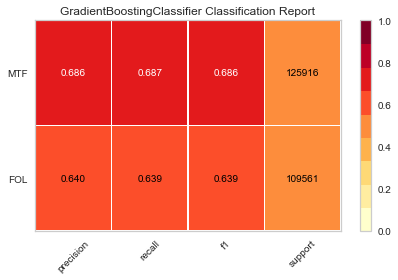

In [242]:
from yellowbrick.classifier import ClassificationReport
fig = plt.figure()
ax = fig.add_subplot()
visualizer = ClassificationReport(gbc, ax=ax, classes=['FOL', 'MTF'], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# Model 7: MLP

In [243]:
from sklearn.neural_network import MLPClassifier

In [244]:
mlp=MLPClassifier(alpha=1)

In [245]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [246]:
expected = y_test
predicted  = mlp.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.62      0.63      0.63    109561
        MTF       0.67      0.66      0.67    125916

avg / total       0.65      0.65      0.65    235477



# Model 8: Bagging

In [247]:
from sklearn.ensemble import BaggingClassifier

In [248]:
bc=BaggingClassifier(n_estimators=100, oob_score=10)

In [249]:
bc.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=10, random_state=None,
         verbose=0, warm_start=False)

In [250]:
expected = y_test
predicted  = bc.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=['FOL','MTF'])
print(classificationReport)

             precision    recall  f1-score   support

        FOL       0.62      0.61      0.61    109561
        MTF       0.66      0.68      0.67    125916

avg / total       0.64      0.65      0.64    235477

